In [2456]:
import csv
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter
import pandas as pd
import seaborn as sn
import math
import scipy.spatial as spatial
import scipy.stats as stats
import numpy as np
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import os

In [2666]:
#Constants
INTERESTING_PATHS = [
    '../sashas-scripts/manyAct_steps/',
    '../sasha-tacas-scripts/tacasHandcraftedModels/',
    '../sasha-tacas-scripts/tacasRealModels/',
    '../sasha-tacas-scripts/tacasRandomConnected/',
]
PATH_TO_CSV_FOLDER = INTERESTING_PATHS[-2]
print("Chosen Path: "+PATH_TO_CSV_FOLDER)

Chosen Path: ../sasha-tacas-scripts/tacasRealModels/


## Load Data

In [2673]:
property_meta_keys = ["Model"]

property_keys = [
    "NumStates",
    "NumActions",
    "NumTargets",
    "NumSinks",
    "NumUnknown",
    "NumMaxActions",
    "NumMaxTransitions",
    "SmallestTransProb",
    "NumProbActions",
    "NumMECs",
    "BiggestMEC",
    "SmallestMEC",
    "AvgMEC",
    "MedianMEC",
    "NumSCCs",
    "BiggestSCC",
    "AvgSCC",
    "NearestTarget",
    "FurthestTarget"
]

analysis_keys = property_meta_keys + property_keys

unknown_threshold = 5
def is_float(entry):
    try:
        float_entry = float(entry)
        return True
    except ValueError:
        return False
    
def is_property_defined(prop, keys, row):
    return (prop in keys and
            is_float(row[prop]))

def should_remove_model(row_to_include, analysis_keys, filter_dict):
    GENERAL_FILTERS = True
    if (GENERAL_FILTERS and not is_property_defined("NumStates", analysis_keys, row_to_include)):
        filter_dict["Timeout"] +=1
        return True
    elif (GENERAL_FILTERS and is_property_defined("NumUnknown", analysis_keys, row) and int(row_to_include["NumUnknown"]) <= unknown_threshold):
        filter_dict["Unknown<=%d" % unknown_threshold] +=1
        print("Model %s has less than %d unknown states --> too easy " % (row["Model"], unknown_threshold))
        return True
    
    #Special Filtering Criteria for different test-suites
    SPECIAL_FILTERS = False
    if (SPECIAL_FILTERS):
        filter_conditions = [
            "hm_25" in row_to_include["Model"],
            #is_float(row_to_include["NearestTarget"]) and int(row_to_include["NearestTarget"]) > 5,
            is_float(row_to_include["NumMaxTransitions"]) and int(row_to_include["NumMaxTransitions"]) < 10,
            #is_float(row_to_include["NumMECs"]) and int(row_to_include["NumMECs"]) != 0,
            #int(row_to_include["NumStates"]) < 1000,
            #not "MinAct_10" in row_to_include["Model"],
            "MinTransProb_0.0001" not in row_to_include["Model"],
            #"Type-tree" in row_to_include["Model"]
        ]
        
        if (True in filter_conditions):
            return True
        
        
    return False

def normalization(row, analysis_keys):
    if (is_property_defined("NumStates", analysis_keys, row)):
        for value_to_normalize in [
            "NumTargets",
            "NumSinks",
            "NumUnknown",
        ]:
            if (value_to_normalize in analysis_keys):
                row[value_to_normalize] = float(row[value_to_normalize]) / float(row["NumStates"]) 

filter_dict = dict()
filter_dict["Unknown<=%d" % unknown_threshold] = 0 #Not an interesting model
filter_dict["Timeout"] = 0
filter_dict["SpecialFilters"] = 0
table_properties = []
total_rows = 0
with open(PATH_TO_CSV_FOLDER+'analysis.csv', newline='\n') as propertiesFile:
        reader = csv.DictReader(propertiesFile)
        for row in reader:
            total_rows += 1
            row_to_include = {k:row[k] for k in analysis_keys if k in row}
            
            
            
            for key in analysis_keys:
                if (row_to_include[key] == " ?"):
                    row_to_include[key] = 0

            #Filtering
            if (should_remove_model(row_to_include, analysis_keys, filter_dict)):
                continue

            #Normalizations
            normalization(row_to_include, analysis_keys)

            table_properties.append(row_to_include)

print("With filtering there are %d/%d models left to check from" % (len(table_properties), total_rows))
print("The rest was filtered because of following reasons: ")
print(filter_dict)

Model AV10_10_1 has less than 5 unknown states --> too easy 
Model AV15_15_1 has less than 5 unknown states --> too easy 
Model cdmsn has less than 5 unknown states --> too easy 
Model coins has less than 5 unknown states --> too easy 
Model hallway10_10_1 has less than 5 unknown states --> too easy 
Model hallway15_15_1 has less than 5 unknown states --> too easy 
Model mdsm2 has less than 5 unknown states --> too easy 
Model teamform3 has less than 5 unknown states --> too easy 
Model teamform4 has less than 5 unknown states --> too easy 
With filtering there are 17/26 models left to check from
The rest was filtered because of following reasons: 
{'Unknown<=5': 9, 'Timeout': 0, 'SpecialFilters': 0}


In [2674]:
#print(*list(map(lambda x : (x["Model"]), table_properties)), sep= "\n")

In [2695]:
metaKeys = ["Model", "#States"]

tacas_keys = [
    "BVI",
    "D_BVI",
    "D_SVI",
    "DG_BVI",
    "DG_SVI",
    "G_BVI",
    "G_OVI",
    "G_SVI",
    "OPT_OVI",
    "OVI",
    "SVI",
    "TOP_BVI",
    "TOP_OVI",
    "TOP_SVI",
    "TOP_VI",
    "T_BVI",
    "T_OVI",
    #"T_SVI",
    "VI",
    "WP"
]

reduced_config_keys = [
    #"BVI_D",
    "BVI_100",
    ##"GBVI_1",
    ##"GBVI_100",
    #"GSVI_100",
    #"OVI_1",
    "OVI_100",
    ##"OVI_1_opt",
    "SVI_100",
    #"TBVI_1",
    "TBVI_100",
    ##"TGBVI_100",
    #"TGSVI_100",
    #"TOVI_100",
    #"TOVI_1_opt",
    #"TOVI_100_opt"
    #"TSVI_100",
    #"VI"
]

config_keys = tacas_keys

relevantKeys = metaKeys + config_keys
relevantKeys

['Model',
 '#States',
 'BVI',
 'D_BVI',
 'D_SVI',
 'DG_BVI',
 'DG_SVI',
 'G_BVI',
 'G_OVI',
 'G_SVI',
 'OPT_OVI',
 'OVI',
 'SVI',
 'TOP_BVI',
 'TOP_OVI',
 'TOP_SVI',
 'TOP_VI',
 'T_BVI',
 'T_OVI',
 'VI',
 'WP']

#### Check for Errors

In [2696]:
SEARCH_ERRORS = True
if (SEARCH_ERRORS):
    for conf in config_keys:
        conf_path = PATH_TO_CSV_FOLDER+conf+"/"
        for model_file_name in os.listdir(conf_path):
            with open(conf_path+model_file_name, newline='\n') as conf_model_run:
                for line in conf_model_run:
                    if ("Exception" in line or "Error" in line):
                        print("IN CONF %s AND FILE \n%s: " % (conf, model_file_name))
                        print(line)

IN CONF TOP_OVI AND FILE 
cloud6.log: 
Error: State 30279 was suspected to get value 0.9999980001009999 by playing an action from set [0, 4] but 0 would only yield value 0.999899000101, which is not optimal. Thus, the TOP heuristic failed. Try another solution method...

IN CONF TOP_OVI AND FILE 
cloud5.log: 
Error: State 5509 was suspected to get value 0.9999999977502515 by playing an action from set [4, 5] but 4 would only yield value 0.9999987490005017, which is not optimal. Thus, the TOP heuristic failed. Try another solution method...

IN CONF TOP_SVI AND FILE 
two_investors.log: 
java.lang.ArrayIndexOutOfBoundsException: -1

IN CONF TOP_SVI AND FILE 
two_investors.log: 
Error: Caught unhandled exception, aborting....

IN CONF TOP_SVI AND FILE 
cloud6.log: 
Error: State 34920 was suspected to get value 0.99 by playing an action from set [0, 1, 2, 3] but 3 would only yield value 0.0, which is not optimal. Thus, the TOP heuristic failed. Try another solution method...

IN CONF TOP_S

#### Load Config Data

In [2697]:
#Filtering Options

def should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved):
    return False
    #return at_least_one_has_not_solved
    #return not at_least_one_has_solved

In [2698]:
def modelIncludedInProperties(model_name, table_properties):
    for row in table_properties:
        if row["Model"] == model_name:
            return True
    return False

In [2699]:
table_times = []
excluded_times = []
print("PATH: ",PATH_TO_CSV_FOLDER+'times.csv')

conf_filter_dict = dict()
conf_filter_dict["NooneHasSolved"] = 0

with open(PATH_TO_CSV_FOLDER+'times.csv', newline='\n') as timesFile:
    reader = csv.DictReader(timesFile)
    for row in reader:
        parsed_row = {k:row[k] for k in relevantKeys if k in row}

        # Filtering
        if not modelIncludedInProperties(parsed_row["Model"], table_properties):
            continue
        if parsed_row["#States"] == '' or parsed_row["#States"] == None:
            parsed_row["#States"] = 100020
            pass
        at_least_one_has_solved = False
        at_least_one_has_not_solved = False
        for config_key in config_keys:
            if (is_float(parsed_row[config_key])):
                at_least_one_has_solved = True
                #print(parsed_row)
            else:
                print("%s couldn't solve %s" % (config_key, parsed_row["Model"]))
                at_least_one_has_not_solved = True


        if (should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved)):
            conf_filter_dict["NooneHasSolved"]+=1
            excluded_times.append(parsed_row)
        else:
            table_times.append(parsed_row)
print("After filtering, %d models are left in total" % len(table_times))
print("The not included confs are due to the following reasons: ")
print(conf_filter_dict)

PATH:  ../sasha-tacas-scripts/tacasRealModels/times.csv
TOP_BVI couldn't solve AV10_10_2
TOP_OVI couldn't solve AV10_10_2
TOP_SVI couldn't solve AV10_10_2
TOP_VI couldn't solve AV10_10_2
TOP_BVI couldn't solve AV10_10_3
TOP_OVI couldn't solve AV10_10_3
TOP_SVI couldn't solve AV10_10_3
TOP_VI couldn't solve AV10_10_3
D_SVI couldn't solve AV15_15_2
DG_BVI couldn't solve AV15_15_2
DG_SVI couldn't solve AV15_15_2
G_SVI couldn't solve AV15_15_2
SVI couldn't solve AV15_15_2
TOP_BVI couldn't solve AV15_15_2
TOP_OVI couldn't solve AV15_15_2
TOP_SVI couldn't solve AV15_15_2
TOP_VI couldn't solve AV15_15_2
TOP_BVI couldn't solve AV15_15_3
TOP_OVI couldn't solve AV15_15_3
TOP_SVI couldn't solve AV15_15_3
TOP_VI couldn't solve AV15_15_3
TOP_OVI couldn't solve cloud5
TOP_SVI couldn't solve cloud5
TOP_OVI couldn't solve cloud6
TOP_SVI couldn't solve cloud6
TOP_VI couldn't solve cloud6
TOP_BVI couldn't solve dice150
TOP_OVI couldn't solve dice150
TOP_SVI couldn't solve dice150
TOP_VI couldn't solve d

In [2700]:
table_iters = []
excluded_iters = []
print("PATH: ",PATH_TO_CSV_FOLDER+'iters.csv')

conf_filter_dict = dict()
conf_filter_dict["NooneHasSolved"] = 0

with open(PATH_TO_CSV_FOLDER+'iters.csv', newline='\n') as iters:
    reader = csv.DictReader(iters)
    for row in reader:
        parsed_row = {k:row[k] for k in relevantKeys if k in row}

        # Filtering
        if not modelIncludedInProperties(parsed_row["Model"], table_properties):
            continue
        if not is_float(parsed_row["#States"]):
            parsed_row["#States"] = 100020
            pass
        at_least_one_has_solved = False
        at_least_one_has_not_solved = False
        for config_key in config_keys:
            if (parsed_row[config_key] != "" and parsed_row[config_key] != " "):
                at_least_one_has_solved = True
            else:
                at_least_one_has_not_solved = True


        if (should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved)):
            conf_filter_dict["NooneHasSolved"]+=1
            excluded_iters.append(parsed_row)
        else:
            table_iters.append(parsed_row)
print("After filtering, %d models are left in total" % len(table_iters))
print("The not included confs are due to the following reasons: ")
print(conf_filter_dict)

PATH:  ../sasha-tacas-scripts/tacasRealModels/iters.csv
After filtering, 17 models are left in total
The not included confs are due to the following reasons: 
{'NooneHasSolved': 0}


In [2701]:
#Test Read Filed
for row in table_times:
    #print(row)
    pass

for row in table_properties:
    pass

### Unify Data

In [2702]:
table_times = sorted(table_times, key=lambda row: int(row['#States']))
table_properties = sorted(table_properties, key=lambda row: int(row['NumStates']))

In [2703]:
USE_TIMES = True
USE_ITERS = False

threshold_time = 15 * 60
threshold_iter = 1000000000
PENTALY_FOR_NOT_FINISHING = min(15 * 60, threshold_time) #900s is 15 min computation time
CLIP_DATA = True

print("USE_TIMES: %r, USE_ITER: %r, SHOULD CLIP? %r" % (USE_TIMES, USE_ITERS, CLIP_DATA))

iter_prefix = "" if (not USE_TIMES) else "Iter_"

data = dict()
model_names = []
for key in property_keys:
        data[key] = []
for key in config_keys:
        data[key] = []
        if (USE_TIMES and USE_ITERS):
            data[iter_prefix+key] = []


def getIndexOfModelInTable(table, modelName, use):
    if (use):
        for j in range(len(table)):
            if (table[j]["Model"] == modelName):
                return j
    return -1

def shouldKeepModel(index, use):
    return ((not use) or (use and index >=0))
          
    
#Gather the whole data
#Highly inefficient I suppose
for i in range(len(table_properties)):
    properties_row = table_properties[i]
    
    iter_index = getIndexOfModelInTable(table_iters, properties_row["Model"], USE_ITERS)
    time_index = getIndexOfModelInTable(table_times, properties_row["Model"], USE_TIMES)
    
    #Should keep row?
    if (not shouldKeepModel(time_index, USE_TIMES)):
        continue
    elif (not shouldKeepModel(iter_index, USE_ITERS)):
        continue
    
    model_names.append(properties_row["Model"])
    #Parse Data
    for key in property_keys:
                if (not is_float(properties_row[key])):
                      data[key].append(0)
                else: 
                        data[key].append(float(properties_row[key]))

    for key in config_keys:
            #Times
            if (USE_TIMES):
                times_row = table_times[time_index]
                if (not is_float(times_row[key])):
                        data[key].append(PENTALY_FOR_NOT_FINISHING)
                else:
                        entry = float(times_row[key])
                        entry = min(entry, threshold_time) if CLIP_DATA else entry
                        data[key].append(entry)
            
            #Iters
            if (USE_ITERS):
                iters_row = table_iters[iter_index]
                if (not is_float(iters_row[key])):
                        data[iter_prefix+key].append(1000) # How to set penatly for not finishing fo iters?
                else:
                        entry = int(iters_row[key])
                        entry = min(entry, threshold_iter) if CLIP_DATA else entry
                        data[iter_prefix+key].append(entry)

USE_TIMES: True, USE_ITER: False, SHOULD CLIP? True


### Attach labels if you want to

In [2704]:
USE_LABELS = False
if (USE_LABELS):
    model_name_labels = [
        "MinAct_2", #Default Label
        "MinAct_5",
        "MinAct_10",
    ]
    labeling = []

    counter = 0
    for model in model_names:
        for label in model_name_labels:
            if (label in model):
                labeling.append(label)
                break
        counter+=1
        if (counter > len(labeling)):
            labeling.append(model_name_labels[0])

    color_options = [
        "blue",
        "red",
        "green",
        "cyan"
    ]
    
    pandas_labels = pd.Series(labeling)

    coloring = dict()
    for i in range(len(model_name_labels)):
        coloring[model_name_labels[i]] = color_options[i]

    print(coloring)

In [2705]:
def findModelWithNameInTable(table, modelName):
    for row in table:
        if row["Model"] == modelName:
            return row

### Look at Models left

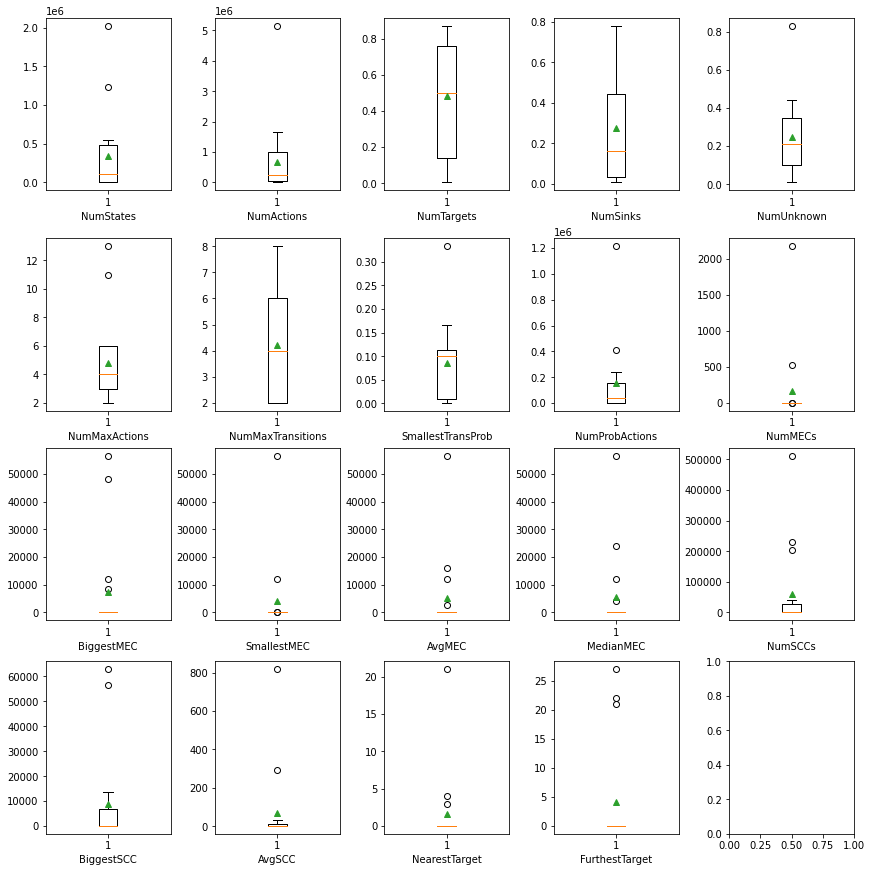

In [2706]:
#Make Boxplots

entries_per_column = 5
entries_per_row = int(math.ceil(len(property_keys)/5))
fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
row = 0
column = 0
for property_key in property_keys:
        if (column == entries_per_column):
            row += 1
            column = 0
        axs[row, column].boxplot(data[property_key], showmeans=True)
        axs[row, column].set_xlabel(property_key)
        column+=1

In [2707]:
#Print out specific stuff you are interested in
data_as_np = dict(data)
for key in data_as_np.keys():
    data_as_np[key] = np.asarray(data_as_np[key])
    
#for key in property_keys:    
for key in ["NumStates", "BiggestMEC", "NumMECs", "NumMaxActions", "NumProbActions", "NumUnknown"]:
    print("Key: ", key)
    print("\t Min: ",data_as_np[key].min())
    print("\t Max: ",data_as_np[key].max())
    print("\t Mean: ",data_as_np[key].mean())

Key:  NumStates
	 Min:  102.0
	 Max:  2025000.0
	 Mean:  339173.70588235295
Key:  BiggestMEC
	 Min:  0.0
	 Max:  56554.0
	 Mean:  7362.588235294118
Key:  NumMECs
	 Min:  0.0
	 Max:  2176.0
	 Mean:  159.41176470588235
Key:  NumMaxActions
	 Min:  2.0
	 Max:  13.0
	 Mean:  4.823529411764706
Key:  NumProbActions
	 Min:  8.0
	 Max:  1215000.0
	 Mean:  157280.5294117647
Key:  NumUnknown
	 Min:  0.008764733371410769
	 Max:  0.8326693227091634
	 Mean:  0.2456823446951681


## Look at some graph to gain understanding of dataset

In [2708]:
x_axis = range(len(table_times))
y_axises = dict()

#Init y_axises
for key in config_keys:
    y_axises[key] = data[key]

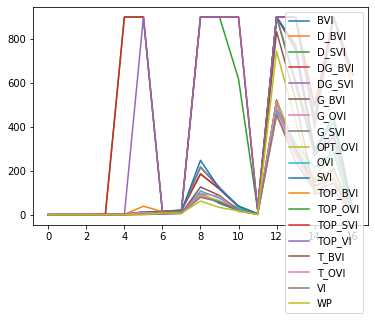

In [2709]:
for config in y_axises.keys():
    plt.plot(x_axis, y_axises[config], label=config)
plt.legend()
plt.show()

Conf VI: 	1131.708000
Conf T_OVI: 	1227.649000
Conf G_OVI: 	1247.656000
Conf D_BVI: 	1262.759000
Conf G_BVI: 	1306.492000
Conf BVI: 	1363.960000
Conf OPT_OVI: 	1517.091000
Conf OVI: 	1530.184000
Conf WP: 	1575.726000
Conf T_BVI: 	1828.879000
Conf G_SVI: 	2560.061000
Conf DG_BVI: 	2668.101000
Conf D_SVI: 	2672.166000
Conf DG_SVI: 	2776.455000
Conf SVI: 	2852.317000
Conf TOP_BVI: 	6478.351000
Conf TOP_VI: 	7393.872000
Conf TOP_OVI: 	8056.608000
Conf TOP_SVI: 	8393.284000


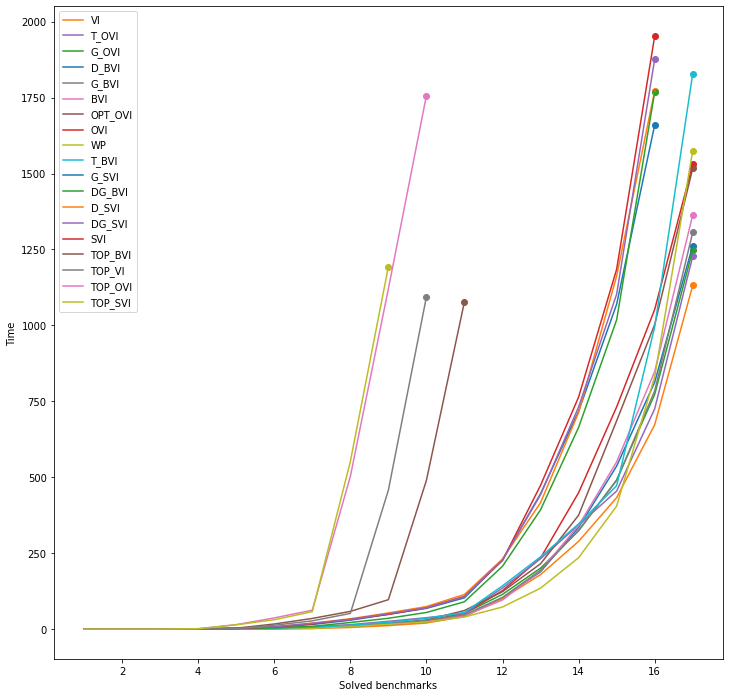

In [2710]:
# Since we want to sort legend by when an algo stops (So e.g. condon first, as it solves only 5), we need this method to find min. 
# for_ordering is a dict that maps each algo to a tuple: (Number of solved benchmarks, time to solve them all)
mydict = dict()

def my_min(for_ordering):
    min = (math.inf,math.inf) #certainly greater, as only 34 benchmarks
    min_algo = "None"
    for algo in for_ordering.keys():
        bench,time = for_ordering[algo]
        
        if bench < min[0] or (bench == min[0] and time > min[1]):
            min = (bench,time)
            min_algo = algo
    return min_algo

for algo in config_keys:
    subres = [float(i) for i in data[algo] if (i != PENTALY_FOR_NOT_FINISHING)]
    subres.sort()
    myDict[algo] = [i for i in subres]
    if (subres == []):
        print("For Algo %s not one model was solved" % (algo))
    for_ordering[algo] = (len(subres),subres[len(subres)-1])

# Get a list of algos in order for the legend
ordered_algos = []
while bool(for_ordering):
    min_algo = my_min(for_ordering)
    ordered_algos += [min_algo]
    for_ordering.pop(min_algo)


#print(myDict)

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.set_xlabel("Solved benchmarks")
ax1.set_ylabel("Time")

#fig2, ax2 = plt.subplots()
#ax2.set_xlabel("Time")
#ax2.set_ylabel("Solved benchmarks")


x = range(1,len(data["NumStates"])+1)

#x2 = range(0,1700)

legend_sorting = []
runtimes = dict()
for conf in config_keys:
    runtimes[conf] = np.array(data[conf]).sum()
    legend_sorting.append([conf, runtimes[conf]])
legend_sorting.sort(key = lambda x : x[1])
for conf in legend_sorting:
    print("Conf %s: \t%f" % (conf[0], conf[1]))

ordered_algos.reverse()
for algo in ordered_algos:
    y = [sum(myDict[algo][:i+1]) for i in range(0,len(myDict[algo])) if myDict[algo][i] != PENTALY_FOR_NOT_FINISHING]
    ax1.plot([i for i in x if i<=len(myDict[algo])],y, label=algo)
    ax1.scatter(x[len(myDict[algo])-1],y[len(myDict[algo])-1])
    handles, labels = ax1.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: runtimes[t[0]]))
    #print(labels)
    #print(handles)
    ax1.legend(handles, labels)
    #plt.legend(loc="upper left")
    
    """
    if algo == "19":
    ax1.plot([i for i in x if i<=len(myDict[algo])],y, label=algo, c='tab:brown', zorder=1)
    ax1.scatter(x[len(myDict[algo])-1],y[len(myDict[algo])-1], s=30, marker='*', c='tab:brown', zorder=2)
    """

#fig2.savefig('Time2Bench')



(0.0, 100.0)

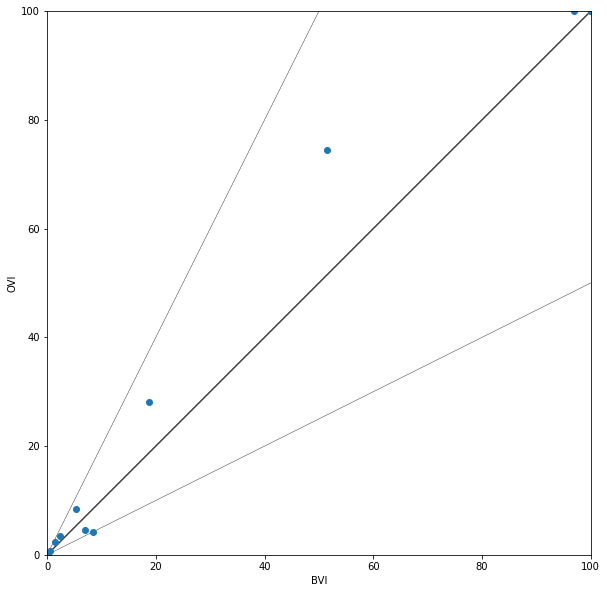

In [2711]:
#Use scale that doubles itself (as in OVI paper)
algo_on_x = "BVI"
algo_on_y = "OVI"

#Transform Data
data_for_x = data[algo_on_x].copy()
data_for_y = data[algo_on_y].copy()

axis_limits = [0,100]

for i in range(len(data_for_x)):
    if (data_for_x[i] > axis_limits[1]):
        data_for_x[i] = axis_limits[1]

for i in range(len(data_for_y)):
    if (data_for_y[i] > axis_limits[1]):
        data_for_y[i] = axis_limits[1]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data_for_x, data_for_y)
ax.plot(axis_limits, axis_limits, 'k-', alpha=0.75, zorder=0)
ax.plot(list(map(lambda x : x * 2, axis_limits)), axis_limits, 'k-', alpha=0.75, zorder=0, linewidth = 0.5)
ax.plot(list(map(lambda x : x / 2, axis_limits)), axis_limits, 'k-', alpha=0.75, zorder=0, linewidth = 0.5)
ax.set_aspect('equal')
ax.set_xlabel(algo_on_x)
ax.set_ylabel(algo_on_y)
ax.set_xlim(axis_limits)
ax.set_ylim(axis_limits)

# Tell me more about the models where ...

In [2712]:
# Define comparation functions
def compare_two_confs(conf_a, conf_b, remove_where_function_is_true):
    model_indices = []
    for i in range(len(data['NumStates'])):
        model = model_names[i]

        model_is_interesting = True
        for f in remove_where_function_is_true:
            if (f(data[conf_a][i], data[conf_b][i])):
                model_is_interesting = False
                break 
        if not model_is_interesting:
            continue
        
        model_indices.append(i)
    return model_indices 

In [2658]:
# Define evaluation
def evaluate_conf_comparison(conf_a, conf_b, filtered_indices, interesting_props):
    for index in filtered_indices:
        model_name = model_names[index]
        print("Model: %s" % model_name)
        print("%s: %f" % (conf_a, data[conf_a][index]))
        print("%s: %f" % (conf_b, data[conf_b][index]))

        for prop_key in interesting_props:
            print("%s: %f" % (prop_key, data[prop_key][index]))

In [2659]:
# Define filters
remove_where = [
    lambda x,y : y >= 5 * x
]

In [2660]:
# Get Results
bvi_svi = compare_two_confs("BVI", "SVI", [lambda x,y : x < 5 * y])
non_bvi_svi = compare_two_confs("BVI", "SVI", [lambda x,y : x >= 5 * y])
print(len(bvi_ovi))
print(len(non_bvi_ovi))
evaluate_conf_comparison("BVI", "SVI", bvi_svi, [])

bvi_svi = compare_two_confs("BVI", "SVI", remove_where)

ovi_svi = compare_two_confs("OVI", "SVI", [lambda x,y : x < 5 * y])
svi_ovi = compare_two_confs("SVI", "OVI", [lambda x,y : x < 5 * y])
print(ovi_svi)
print(svi_ovi)
print("OVI_SVI: %i" % len(ovi_svi))
print("SVI_OVI: %i" % len(svi_ovi))

for i in ovi_svi:
    if (i in svi_ovi):
        pass
        print("%s in bvi_svi" % (model_names[i]))

#interesting_props = ["BiggestSCC", "BiggestMEC"]
interesting_props = property_keys

#evaluate_conf_comparison("OVI", "SVI", ovi_svi, [])

14
59
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_10
BVI: 69.923000
SVI: 1.811000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_12
BVI: 70.952000
SVI: 1.476000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_15
BVI: 120.000000
SVI: 2.200000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_18
BVI: 73.952000
SVI: 1.386000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_19
BVI: 69.370000
SVI: 1.869000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_2
BVI: 78.627000
SVI: 1.373000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_3
BVI: 30.481000
SVI: 1.310000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_4
BVI: 67.343000
SVI: 1.255000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_5
BVI: 65.483000
SVI: 1.188000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_6
BVI: 24.653000
SVI: 0.964000
Model: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_7
BVI: 

In [2661]:
def oneDimensionPropertyScatterPlot(property_keys, a_indices, b_indices):
    entries_per_column = 1
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,16), constrained_layout = True)
    row = 0
    column = 0
    
    for property_key in property_keys:
        data_for_a = []
        data_for_b = []
        for i in a_indices:
            data_for_a.append(data[property_key][i])
        for i in b_indices:
            data_for_b.append(data[property_key][i])
            
        ALPHA_A = 1/len(data_for_a)
        #ALPHA_A = 0.5
        
        
        ALPHA_B = 1/len(data_for_b)
        #ALPHA_B = 0.5
        
        axs[row].scatter(data_for_a, [1]*len(data_for_a), alpha=ALPHA_A, c='red')
        axs[row].scatter(data_for_b, [-1]*len(data_for_b), alpha=ALPHA_B, c='green')
        axs[row].scatter([data_for_a[0], data_for_a[0]], [-3, 3], alpha=0.001) # Set Axis limits
        axs[row].set_xlabel(property_key)
        row+=1

RED: BVI
GREEN: SVI


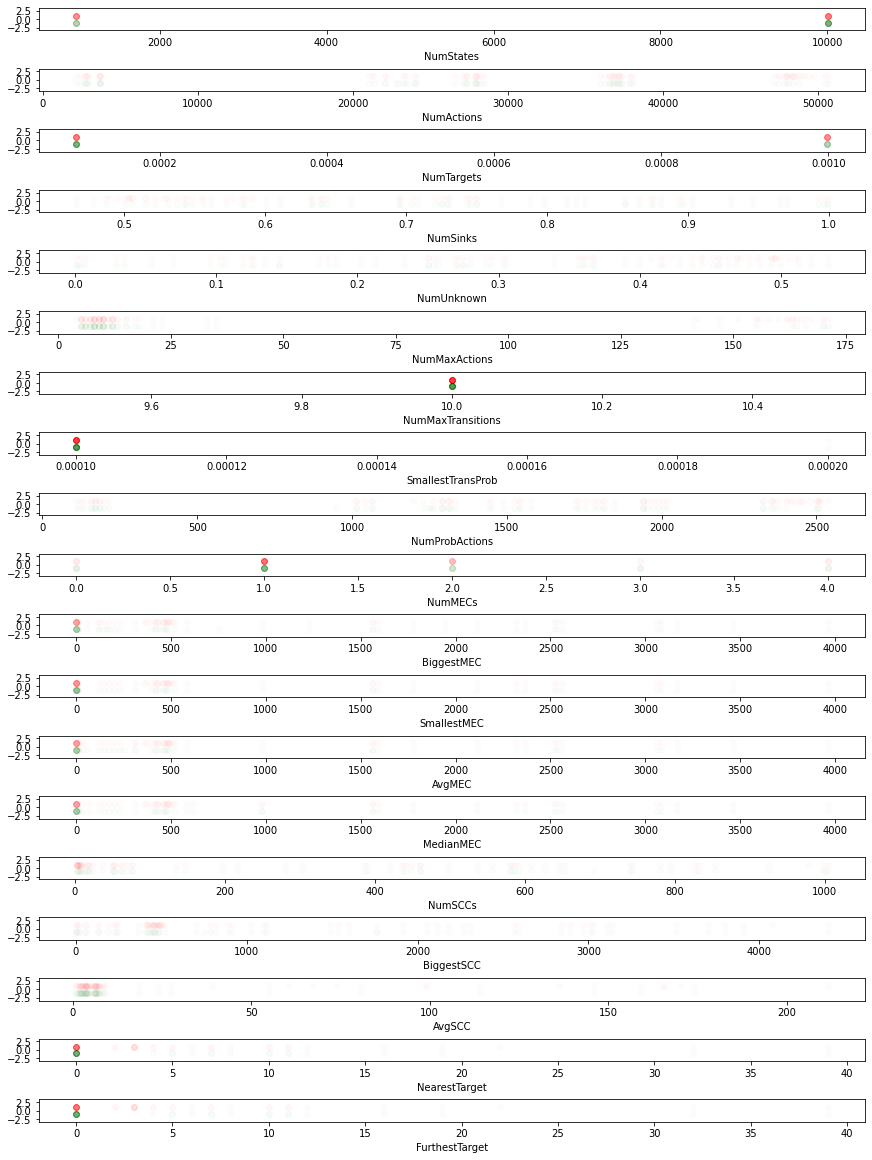

In [2662]:
print("RED: %s" % "BVI")
print("GREEN: %s" % "SVI")

oneDimensionPropertyScatterPlot(interesting_props, bvi_svi, non_bvi_svi)

### Interpret the graph

In [2663]:
print(len(model_names))
print(len(data["NumStates"]))

73
73


In [2664]:
#Get names of models above certain threshold

absolute_allowed_timedifference_in_seconds = 2
relative_allowed_timedifference = 0.1 # 0.1 -> 10% allowed difference
USE_RELATIVE_ERROR = True

confs_to_compare = config_keys
#confs_to_compare = ["OVI_1", "OVI_100"]

fastest_solver = dict()
for index in range(len(data["NumStates"])):
    model = model_names[index]
    print("MODEL: %s" % model)
    fastest_solver[model] = [10000000, []]
    for key in confs_to_compare:
        soln_time = data[key][index]
        print("Conf %s soln time %f" % (key, soln_time))
        if (soln_time != PENTALY_FOR_NOT_FINISHING):
            #print("This is better than NOT FINISHING")
            if (fastest_solver[model][0] > soln_time):
                # Check which of the currently saved models are in the allowed precision
                new_soln_time = fastest_solver[model][0]
                fastest_solvers_for_model = [key]
                for old_key in fastest_solver[model][1]:
                    old_soln_time = data[old_key][index]
                    # Do comparison
                    include_old_key = False
                    
                    USE_RELATIVE_ERROR = new_soln_time > 10
                    
                    if (USE_RELATIVE_ERROR):
                        include_old_key = (1.0 - relative_allowed_timedifference) * new_soln_time <= old_soln_time
                    else:
                        include_old_key = abs(new_soln_time - old_soln_time) <= absolute_allowed_timedifference_in_seconds
                    
                    if (include_old_key):
                        fastest_solvers_for_model.append(old_key)
                
                fastest_solver[model] = [soln_time, fastest_solvers_for_model]
                
            elif (fastest_solver[model][0] == soln_time):
                fastest_solver[model][1].append(key)

MODEL: RANDOM_Size_1002_MinAct_3_MinTransProb_0.0001_Model_15
Conf BVI soln time 0.393000
Conf D_BVI soln time 0.535000
Conf D_SVI soln time 0.721000
Conf G_BVI soln time 0.214000
Conf G_OVI soln time 0.549000
Conf G_SVI soln time 0.273000
Conf OPT_OVI soln time 0.224000
Conf OVI soln time 0.366000
Conf SVI soln time 0.452000
Conf TOP_BVI soln time 0.806000
Conf TOP_OVI soln time 0.603000
Conf TOP_SVI soln time 0.275000
Conf T_BVI soln time 0.512000
Conf T_OVI soln time 0.492000
Conf VI soln time 0.153000
Conf WP soln time 0.181000
MODEL: RANDOM_Size_1002_MinAct_100_MinTransProb_0.0001_Model_1
Conf BVI soln time 0.348000
Conf D_BVI soln time 0.363000
Conf D_SVI soln time 0.988000
Conf G_BVI soln time 0.525000
Conf G_OVI soln time 0.858000
Conf G_SVI soln time 0.833000
Conf OPT_OVI soln time 1.253000
Conf OVI soln time 1.104000
Conf SVI soln time 0.722000
Conf TOP_BVI soln time 120.000000
Conf TOP_OVI soln time 1.411000
Conf TOP_SVI soln time 3.715000
Conf T_BVI soln time 120.000000
Con

In [2665]:
bestSolvers = dict()
for config_key in confs_to_compare:
    bestSolvers[config_key] = 0

for index in range(len(data["NumStates"])):
    model_name = model_names[index]
    for config_key in fastest_solver[model_name][1]:
        bestSolvers[config_key]+=1

for config_key in confs_to_compare:
    print("Config %s was the best solution method %d / %d times" % (config_key, bestSolvers[config_key], len(table_times)))

Config BVI was the best solution method 28 / 73 times
Config D_BVI was the best solution method 14 / 73 times
Config D_SVI was the best solution method 6 / 73 times
Config G_BVI was the best solution method 11 / 73 times
Config G_OVI was the best solution method 18 / 73 times
Config G_SVI was the best solution method 3 / 73 times
Config OPT_OVI was the best solution method 7 / 73 times
Config OVI was the best solution method 7 / 73 times
Config SVI was the best solution method 3 / 73 times
Config TOP_BVI was the best solution method 0 / 73 times
Config TOP_OVI was the best solution method 0 / 73 times
Config TOP_SVI was the best solution method 1 / 73 times
Config T_BVI was the best solution method 0 / 73 times
Config T_OVI was the best solution method 11 / 73 times
Config VI was the best solution method 36 / 73 times
Config WP was the best solution method 11 / 73 times


In [2518]:
#If you want to know which Models a Conf won, use this:
check_conf = "TBBVI_100"
explicit = True

for index in range(len(data["NumStates"])):
    model = model_names[index]
    if check_conf in fastest_solver[model][1]:
        print(model)
        if explicit:
            props = findModelWithNameInTable(table_properties, model)
            #print(props["NumSCCs"])
            for prop in props:
                print(prop," : ", props[prop])

# Do classic Data Mining stuff

## Heatmaps

In [2121]:
excluded_features = [
    #"NumTargets",
    #"SmallestTransProb"
]

correlation_dict = dict(data)

for feature in excluded_features:
    del correlation_dict[feature]

size = len(analysis_keys) - len(excluded_features) + len(config_keys)
print(size)

24


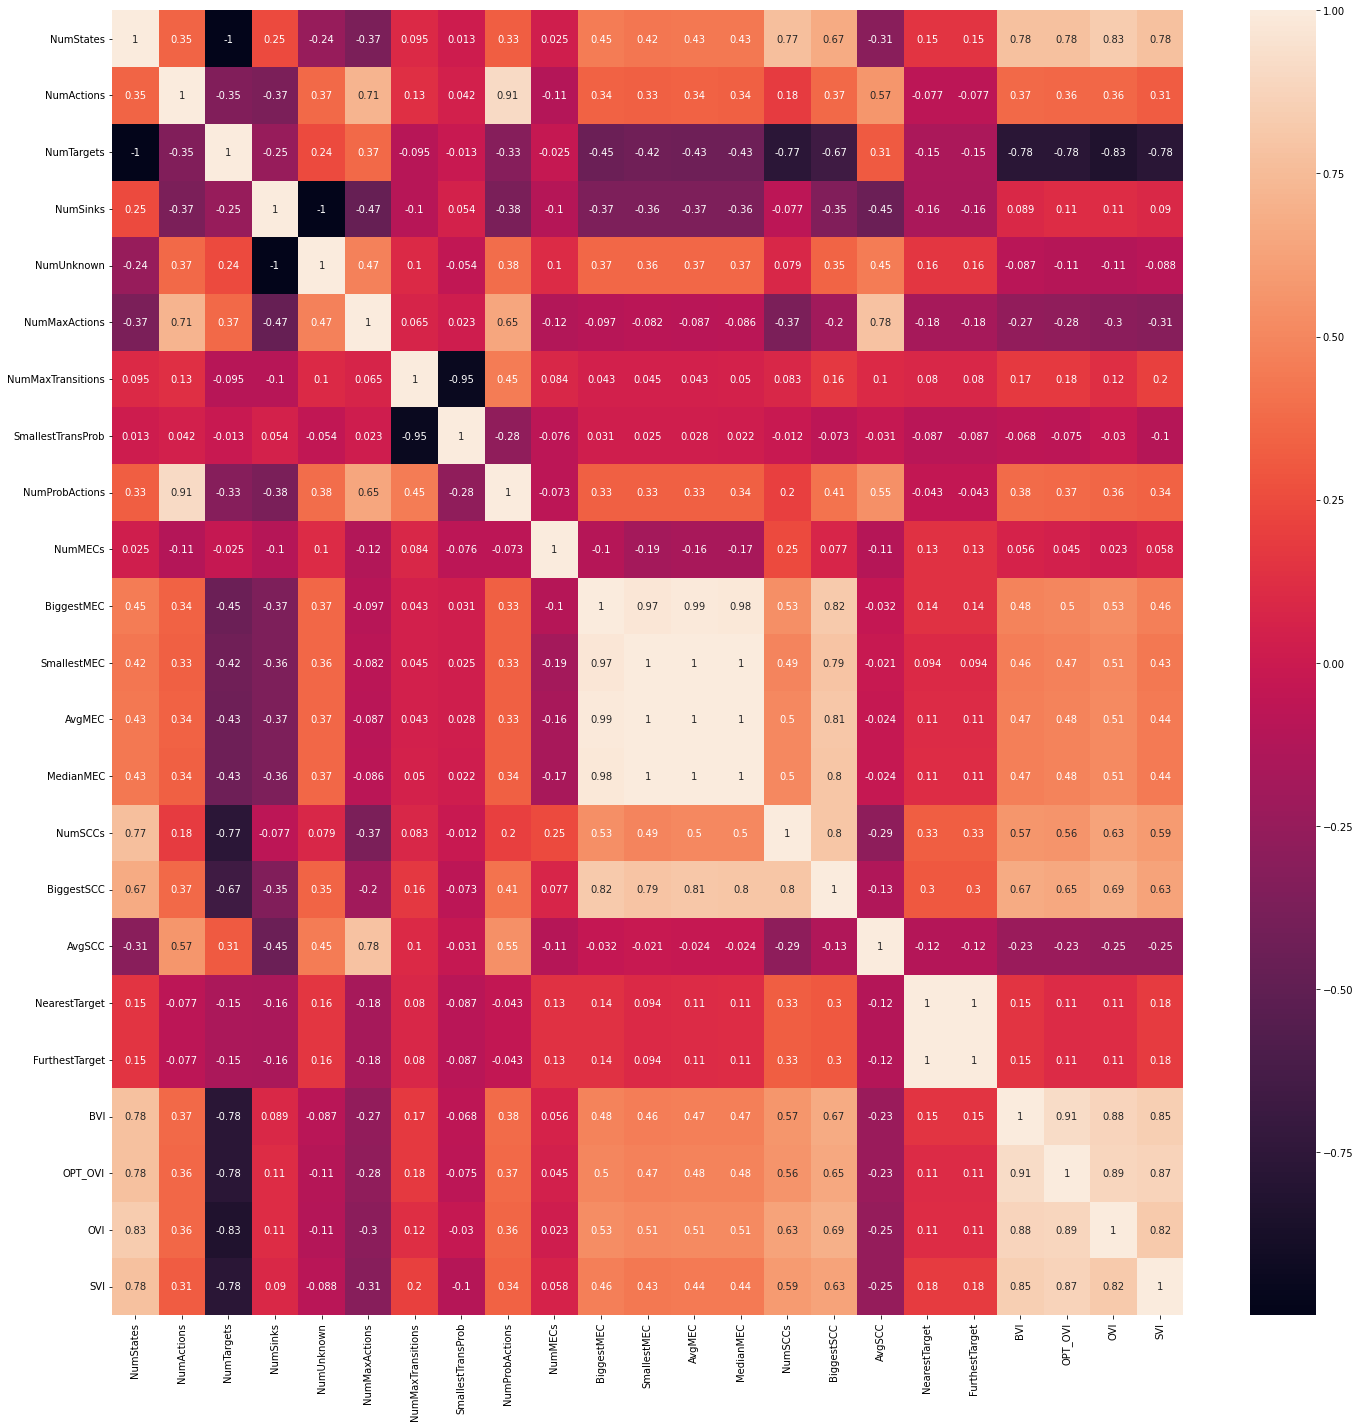

In [2122]:
#Linear Correlation
fig = plt.figure(figsize=(size,size))

df = pd.DataFrame(correlation_dict,columns=correlation_dict.keys())

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


## Scatter Plots

In [2123]:
#Scatterplot
def createScatterPlotForOneProperty(property_key):
    entries_per_column = int(math.sqrt(len(config_keys))+1)
    entries_per_row = entries_per_column
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(16,16), sharey=True)
    row = 0
    column = 0
    for key in config_keys:
        if (column == entries_per_column):
            row += 1
            column = 0
        axs[row, column].scatter(data[property_key], data[key])
        axs[row, column].set_xlabel(property_key),
        axs[row, column].set_ylabel(key)
        column+=1

def createScatterPlotForOneConfig(property_keys):
    entries_per_column = 1    
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            axs[row].scatter(data[property_key], data[key])
            axs[row].set_xlabel(property_key),
            axs[row].set_ylabel(key)
            column+=1

def createScatterPlotForMultipleProperties(property_keys):
    entries_per_column = len(config_keys)
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,20), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            if (USE_LABELS):
                axs[row, column].scatter(data[property_key], data[key], alpha=0.5, c=pandas_labels.map(coloring))
            else:
                axs[row, column].scatter(data[property_key], data[key], alpha=0.2)
            axs[row, column].set_xlabel(property_key),
            axs[row, column].set_ylabel(key)
            column+=1

def createHistPlotForMultipleProperties(property_keys):
    entries_per_column = len(config_keys)
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            sn.histplot(x = data[property_key], y =  data[config_key], cbar=True)
            axs[row, column].set_xlabel(property_key),
            axs[row, column].set_ylabel(key)
            column+=1

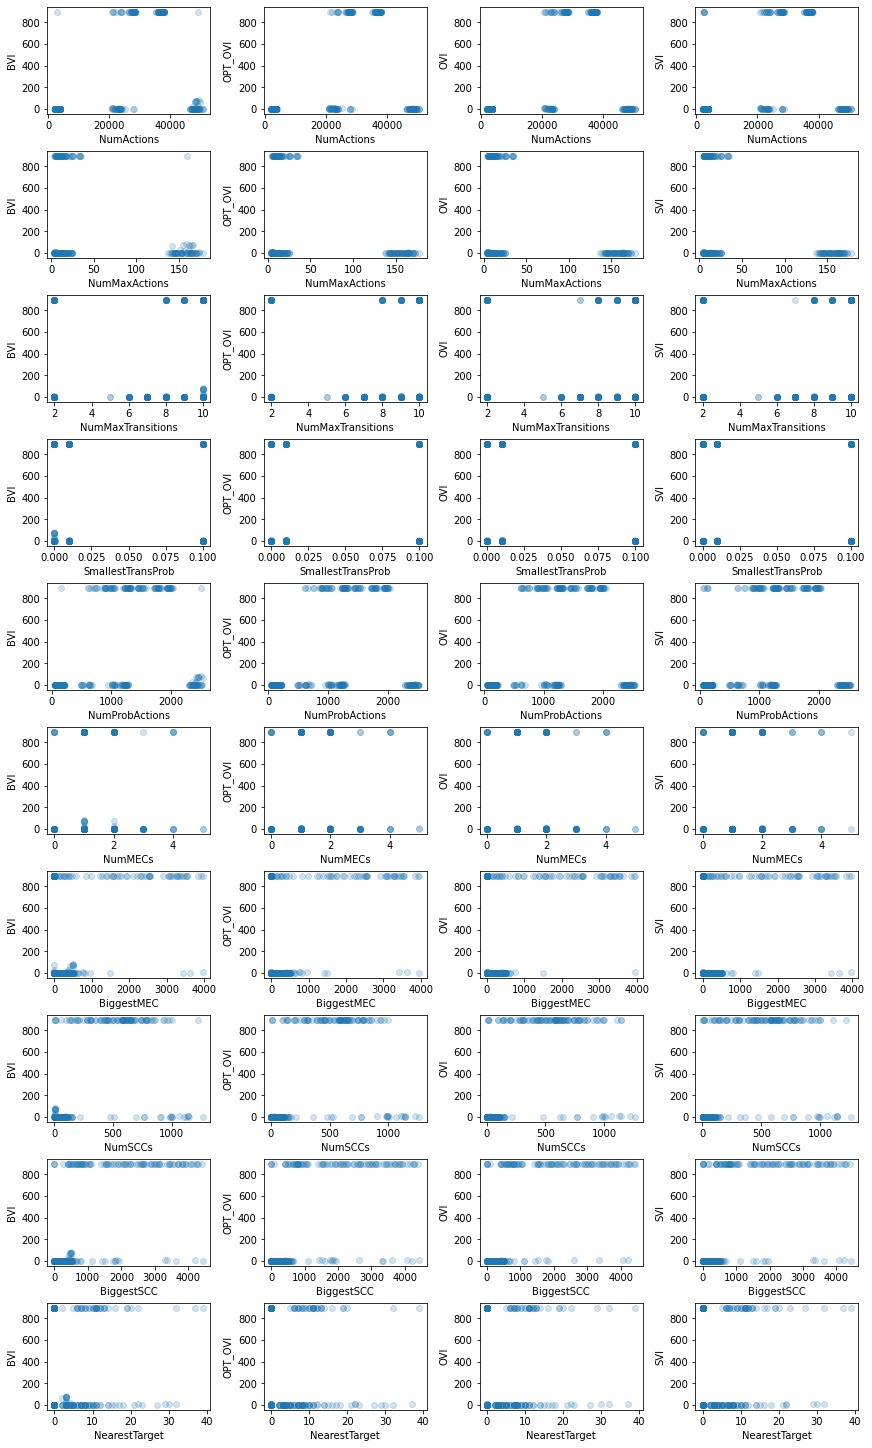

In [2124]:
if(USE_LABELS):
    print(coloring)

createScatterPlotForMultipleProperties(
    [
        #"NumStates",
        #"NumTargets",
        #"NumSinks",
        #"NumUnknown",
        "NumActions",
        "NumMaxActions",
        "NumMaxTransitions",
        "SmallestTransProb",
        "NumProbActions",
        "NumMECs",
        "BiggestMEC",
        #"SmallestMEC",
        #"AvgMEC",
        #"MedianMEC",
        "NumSCCs",
        "BiggestSCC",
        #"AvgSCC",
        "NearestTarget",
        #"FurthestTarget"
    ]
)

In [2125]:
#createHistPlotForMultipleProperties(["BiggestMEC", "NumUnknown", "NumMECs", "NumStates", "NumMaxActions", "NumProbActions"])

## Chi-square Tests: Are two features independent?

In [1210]:
def bin_estimate(length):
    return int(1+math.log2(length))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


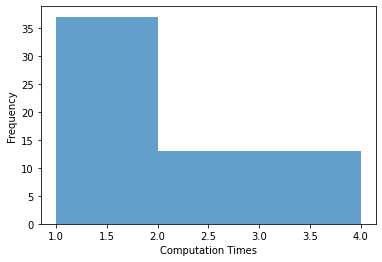

In [1211]:
#Histograms
#Each Bin should contain at least (recommended) 13 entries
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
prop = "NumUnknown"

x_set = [1]*37 + [2]*13 + [3]*13
y_set = [100]*37 + [300]*13 + [500]*13
print(x_set)
x_bins = (1, 2, 3, 4)#bin_estimate(len(data_set))
y_bins = (100, 300, 500, 700)

x_hist_gram = np.histogram(x_set, bins=x_bins)
y_hist_gram = np.histogram(y_set, bins=(100, 200, 300))
n, bins, patches = plt.hist(x=x_set, bins=x_bins, alpha = 0.7)
plt.xlabel('Computation Times')
plt.ylabel('Frequency')

plt.show()


[[37.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0. 13.]]


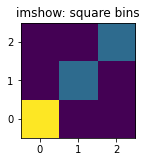

In [1062]:

H, xedges, yedges = np.histogram2d(x_set, y_set, bins=(x_bins, y_bins))
print(H)
# Histogram does not follow Cartesian convention (see Notes),

# therefore transpose H for visualization purposes.

H = H.T
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(131, title='imshow: square bins')

plt.imshow(H, interpolation='nearest', origin='lower')

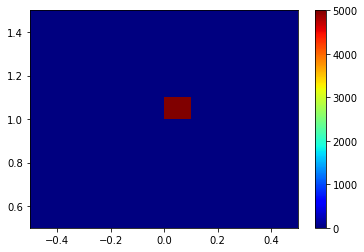

In [1063]:
# create data
x = [0]*5000#np.random.normal(size=5000)
y = [1]*5000#np.random.normal(size=5000)
 
# Big bins
H, x_edges, y_edges, img = plt.hist2d(x, y, bins=(10,10), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# Small bins
#plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
#plt.show()
 
# If you do not set the same values for X and Y, the bins won't be a square!
#plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)
#plt.show()

In [ ]:
#print(H)
ChiSq, p = stats.chisquare(np.ndarray.flatten(H))
print(ChiSq)
print(p)